In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

In [3]:
dataframe_2014 = pd.read_csv("../Resources/OSMI 2014 Mental Health in Tech Survey Results.csv")
dataframe_2020 = pd.read_csv("../Resources/OSMI 2020 Mental Health in Tech Survey Results .csv")
dataframe_2021 = pd.read_csv("../Resources/OSMI 2021 Mental Health in Tech Survey Results .csv")
dataframe_2022 = pd.read_csv("../Resources/OSMI 2022 Mental Health in Tech Survey Results.csv")

dataframe_2020.head()

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?
0,zwrffw6ykfo82ft1twvzwrffw6c6wsfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,45,Male,United States of America,Connecticut,White,NaN,United States of America,Connecticut
1,zhdmhaa8r0125c4zmoi7qzhdmtjrakhm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,24,female,Russia,NaN,NaN,NaN,Russia,NaN
2,x4itwa9hnlw7qke4y5xibx4itwa9yzl5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,mental health should be a law by government.,1,46,Male,India,NaN,NaN,NaN,India,NaN
3,x3v3oimu5pn0043n8x3v3oizaybhwwto,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,25,Female,Canada,NaN,NaN,NaN,Canada,NaN
4,uyp6re7bhnyx6gez09uyp6re72z0e4e4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,1,25,F,Canada,NaN,NaN,NaN,Canada,NaN


In [4]:
dataframe_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
# Attempt at concatenating all the data frames into one data frame. This gives 153 columns and might be difficult to use, keeping it here anyway just in case. 
merged_df = pd.concat([dataframe_2014, dataframe_2020, dataframe_2021, dataframe_2022], ignore_index=True)

In [6]:
#Merging the data frames from 2020, 2021 and 2022 as they have similar datasets
merged_latest_df = pd.concat([dataframe_2020, dataframe_2021, dataframe_2022], ignore_index=True)

In [7]:
#Reducing down the 2014 data frame to give only those with mental health issues and the list of countries. This is to answer proposed analysis question #1 for the pie chart
mental_health_issues_dataframe_2014 = dataframe_2014[dataframe_2014['treatment'] == 'Yes']
mental_health_issues_dataframe_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
10,2014-08-27 11:32:44,31,Male,United States,OH,NaN,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN


In [8]:
#further reduce the 2014 data frame down to just countries
mental_health_issues_dataframe_2014_countries = mental_health_issues_dataframe_2014[['treatment', 'Country']]
mental_health_issues_dataframe_2014_countries.head()


,treatment,Country
0,Yes,United States
3,Yes,United Kingdom
6,Yes,United States
8,Yes,United States
10,Yes,United States


<function matplotlib.pyplot.show(close=None, block=None)>

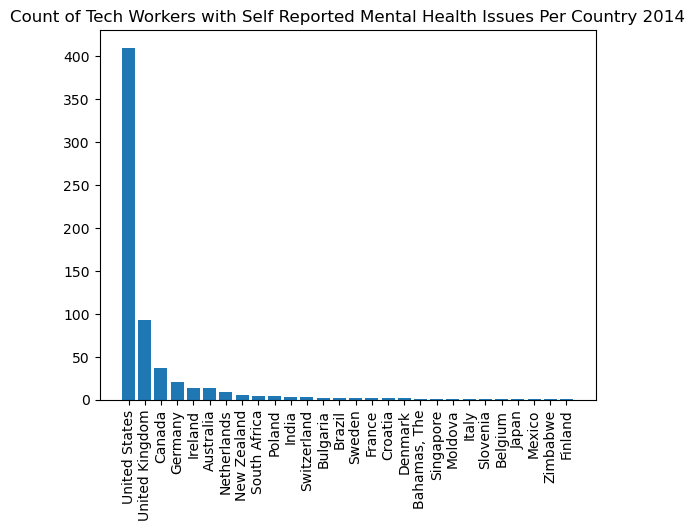

In [9]:
#counting the number of occurences per country
country_count_2014 = mental_health_issues_dataframe_2014_countries['Country'].value_counts()

#plotting the occurences per country in a bar graph
plt.bar(country_count_2014.index, country_count_2014.values)
plt.title('Count of Tech Workers with Self Reported Mental Health Issues Per Country 2014')
plt.xticks(rotation=90)
plt.show

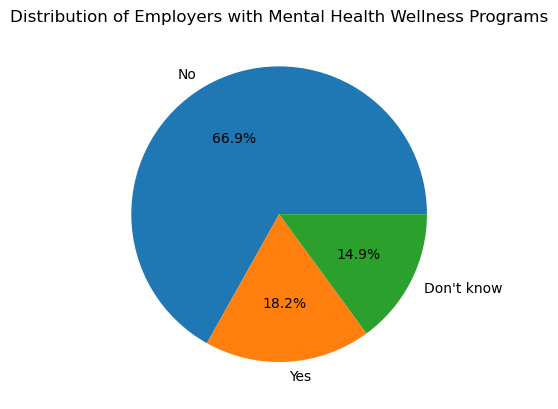

In [46]:

#breaking down value counts of employers with mental health wellness programs
wellness_count_2014 = dataframe_2014['wellness_program'].value_counts()

#Plotting the percentage of employers with wellness programs
plt.pie(wellness_count_2014, labels=wellness_count_2014.index, autopct='%1.1f%%')
plt.title('Distribution of Employers with Mental Health Wellness Programs')
plt.show()


In [44]:
#Creating a dataframe for employees that their employers have wellness programs and they have self reported mental health issues
wellness_program_with_mental_health_issues = mental_health_issues_dataframe_2014[mental_health_issues_dataframe_2014['wellness_program'] == 'Yes']

mental_health_count_with_program = len(wellness_program_with_mental_health_issues)

#Creating a dataframe for employees that their employers do not have or are not aware of wellness programs and they have self reported mental health issues
no_wellness_program_with_mental_health_issues = mental_health_issues_dataframe_2014[(mental_health_issues_dataframe_2014['wellness_program'] == 'No') | (mental_health_issues_dataframe_2014['wellness_program'] == "Don't Know")]
mental_health_count_without_program = len(no_wellness_program_with_mental_health_issues)

#adding the numbers to a list for plotting
sizes = [mental_health_count_without_program, mental_health_count_with_program]
labels = ['Mental Health Issues Count without a Wellness Program', 'Mental Health Issues Count with a Wellness Program']
print(no_wellness_program_with_mental_health_issues['wellness_program'])


0       No
3       No
6       No
8       No
10      No
        ..
1251    No
1254    No
1255    No
1256    No
1258    No
Name: wellness_program, Length: 420, dtype: object


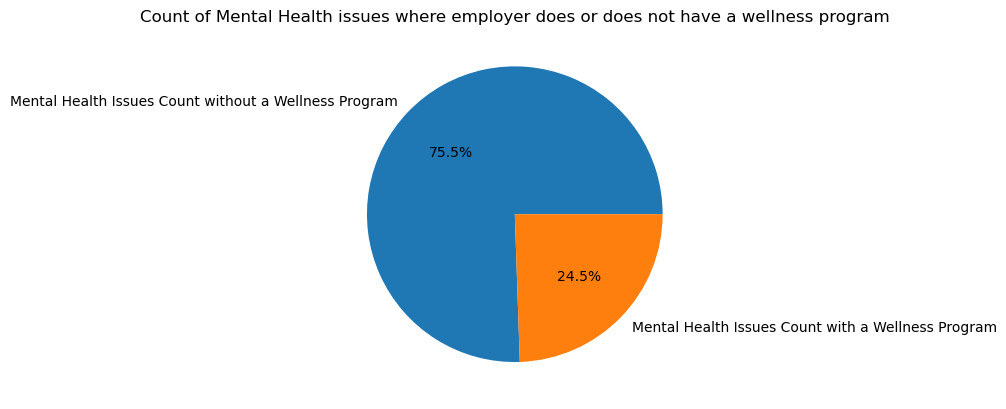

In [45]:
#Plotting the values in a pie chart
#Plotting the percentage of employers with wellness programs



plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Count of Mental Health issues where employer does or does not have a wellness program')
plt.show()

In [49]:
#Remote working employees with mental health issues
remote_workers_with_mental_health_issues_2014 = len(mental_health_issues_dataframe_2014[mental_health_issues_dataframe_2014['remote_work'] == 'Yes'])
print(remote_workers_with_mental_health_issues_2014)

198


In [50]:
#Non Remote working employees with mental health issues
non_remote_workers_with_mental_health_issues_2014 = len(mental_health_issues_dataframe_2014[mental_health_issues_dataframe_2014['remote_work'] == 'No'])
print(non_remote_workers_with_mental_health_issues_2014)

439


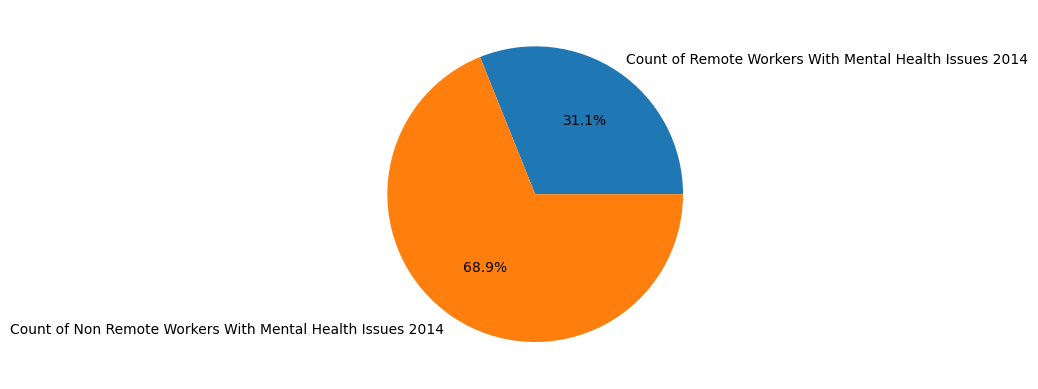

In [51]:
size_remote = [remote_workers_with_mental_health_issues_2014, non_remote_workers_with_mental_health_issues_2014]
labels_remote = ['Count of Remote Workers With Mental Health Issues 2014', 'Count of Non Remote Workers With Mental Health Issues 2014']
plt.pie(size_remote, labels=labels_remote, autopct='%1.1f%%')
plt.show()